### Import the packages 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import os

### Read the csv file into a Panda sheet

In [11]:
current_file_path = os.path.dirname('.')
data_path = os.path.join(current_file_path, 'data', 'insurance.csv')
df = pd.read_csv(data_path)
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


### Create histograms for all numeric columns in the DataFrame to visualize their distributions

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

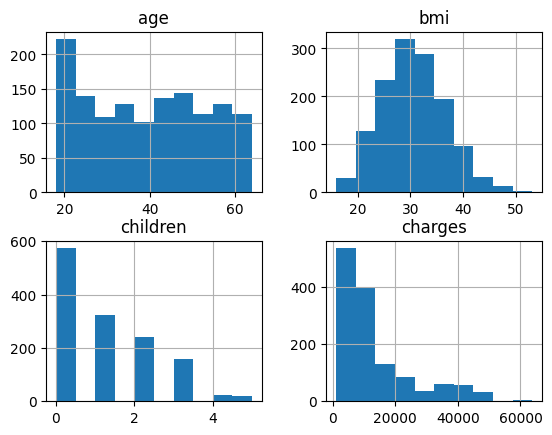

In [3]:
df.hist()


### Replace the nonnumerical columns such as sex and smoker with numbers

In [12]:
one_hot_sex = df.sex.apply(lambda x: 1 if x == 'male' else 0)
one_hot_smoker = df.smoker.apply(lambda x: 1 if x == 'yes' else 0)
df.sex = one_hot_sex
df.smoker = one_hot_smoker
print(df)# Count how many rows belong to southwest region


      age  sex     bmi  children  smoker     region      charges
0      19    0  27.900         0       1  southwest  16884.92400
1      18    1  33.770         1       0  southeast   1725.55230
2      28    1  33.000         3       0  southeast   4449.46200
3      33    1  22.705         0       0  northwest  21984.47061
4      32    1  28.880         0       0  northwest   3866.85520
...   ...  ...     ...       ...     ...        ...          ...
1333   50    1  30.970         3       0  northwest  10600.54830
1334   18    0  31.920         0       0  northeast   2205.98080
1335   18    0  36.850         0       0  southeast   1629.83350
1336   21    0  25.800         0       0  southwest   2007.94500
1337   61    0  29.070         0       1  northwest  29141.36030

[1338 rows x 7 columns]


### Create 4 columns corresponding to the regions and remove the region column

In [13]:
dummy_regions = pd.get_dummies(df.region, dtype=int)
df = pd.concat([df, dummy_regions], axis=1)
df = df.drop('region', axis=1)
print(df)


      age  sex     bmi  children  smoker      charges  northeast  northwest  \
0      19    0  27.900         0       1  16884.92400          0          0   
1      18    1  33.770         1       0   1725.55230          0          0   
2      28    1  33.000         3       0   4449.46200          0          0   
3      33    1  22.705         0       0  21984.47061          0          1   
4      32    1  28.880         0       0   3866.85520          0          1   
...   ...  ...     ...       ...     ...          ...        ...        ...   
1333   50    1  30.970         3       0  10600.54830          0          1   
1334   18    0  31.920         0       0   2205.98080          1          0   
1335   18    0  36.850         0       0   1629.83350          0          0   
1336   21    0  25.800         0       0   2007.94500          0          0   
1337   61    0  29.070         0       1  29141.36030          0          1   

      southeast  southwest  
0             0       

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>],
       [<Axes: title={'center': 'northeast'}>,
        <Axes: title={'center': 'northwest'}>,
        <Axes: title={'center': 'southeast'}>],
       [<Axes: title={'center': 'southwest'}>, <Axes: >, <Axes: >]],
      dtype=object)

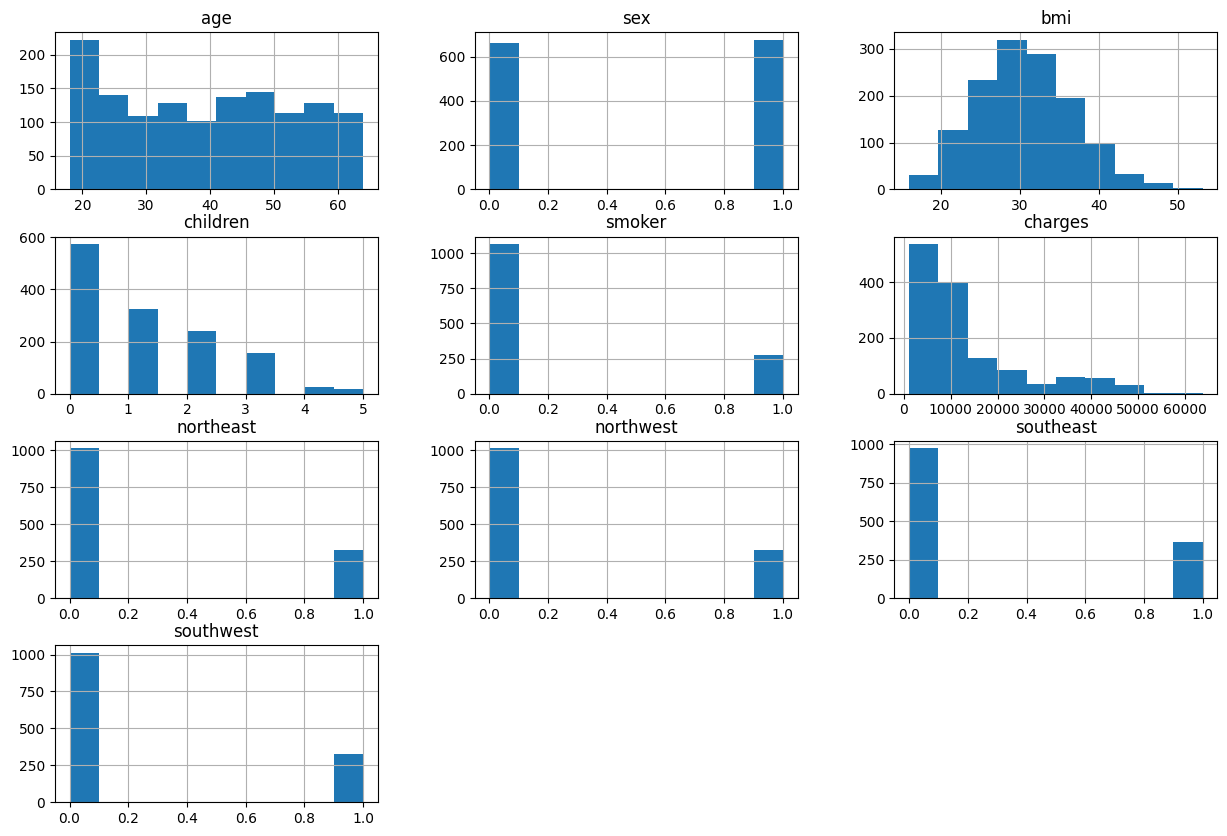

In [14]:
df.hist(figsize=(15,10))

### Visualise the correlations between different varibales of the data frame using heatmap plot 

<Axes: >

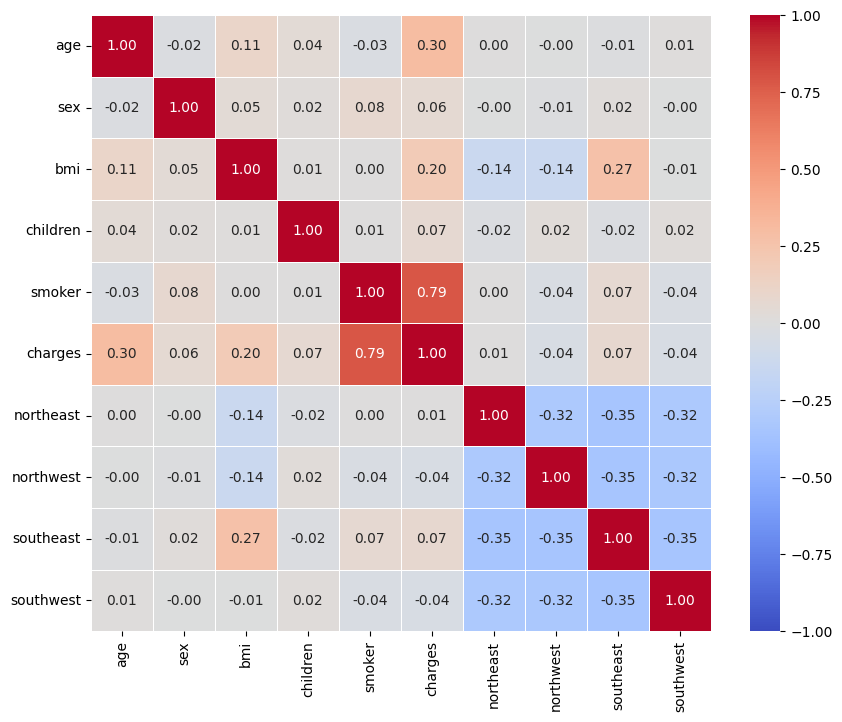

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, vmax=1, vmin=-1)


### Create the traing dataset 

In [16]:
X = df.copy()
X = X.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Initialise a random forest regressor with some heuristic numbers

In [17]:
model = RandomForestRegressor(n_estimators=100, 
                              criterion="squared_error", # "absolute_error"
                              max_depth= 20)

### Train the model

In [18]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20)

### Get the predictions for the test data

In [19]:
y_pred = model.predict(X_test)

### Plot the groundtruth test data versus prediction

Text(0.5, 1.0, 'Pred vs Truth')

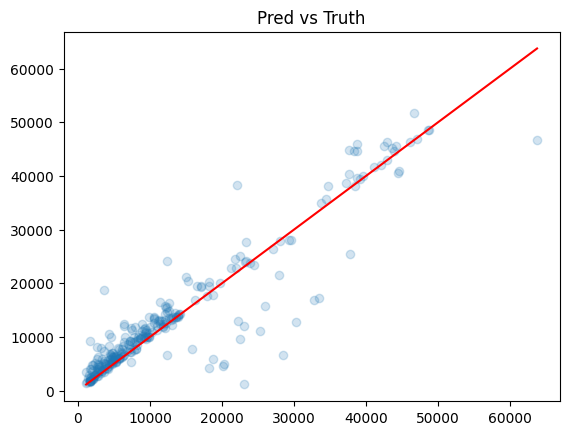

In [20]:
plt.scatter(y_test, y_pred, alpha = 0.2)
line = np.linspace(min(y_test), max(y_test), 2)
plt.plot(line, line, 'r')
plt.title("Pred vs Truth")

### Print metrics of the trained model

In [21]:
mae = mean_absolute_error(y_pred, y_test)
rmse = root_mean_squared_error(y_pred, y_test)
print(f"{rmse = }")
print(f"{mae = }")
print(f"accuracy score = {model.score(X_test, y_test)}")


rmse = 4598.372932064401
mae = 2525.7882447981665
accuracy score = 0.8637989926284002


### Plot the importance of the features

Text(0.5, 1.0, 'Feature Importance')

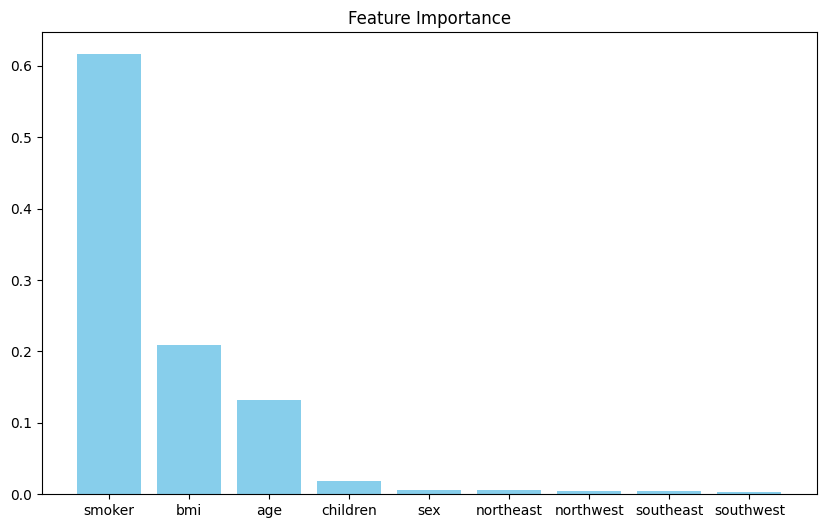

In [22]:
feature_importances = sorted(zip(model.feature_importances_, model.feature_names_in_), 
                             key=lambda x: x[0], reverse=True)

plt.figure(figsize=(10, 6))
plt.bar([x[1] for x in feature_importances], [x[0] for x in feature_importances], color='skyblue')
plt.title('Feature Importance')

### Create a grid of search parameters

In [23]:
param_grid = {
    'n_estimators': [20, 50, 100],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
}
model = RandomForestRegressor(n_jobs=-1, criterion="absolute_error", random_state=42) # "squared_error"



### Train the model using the grid search and 5 fold cross validation approach

In [26]:
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1,
                           )
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(criterion='absolute_error',
                                             n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 100]})

### Get the parameters of the best model

In [28]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


### Print metrics of the best trained model

In [31]:
y_pred_best = best_model.predict(X_test)
mae = mean_absolute_error(y_pred_best, y_test)
rmse = root_mean_squared_error(y_pred_best, y_test)
print(f"{rmse = }")
print(f"{mae = }")
print(f"accuracy score = {best_model.score(X_test, y_test)}")


rmse = 4537.559618558206
mae = 2396.749370534701
accuracy score = 0.8673776777811475


### Plot the groundtruth test data versus prediction of the best model and prediction of the heuristic mdoel

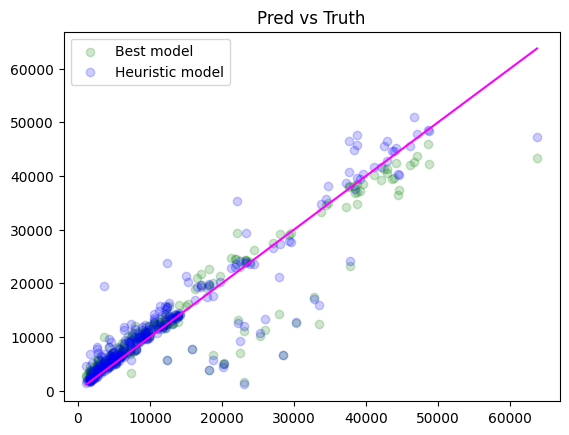

In [32]:
plt.scatter(y_test, y_pred_best, c='g', alpha=0.2)
plt.scatter(y_test, y_pred, c='b', alpha=0.2)
line = np.linspace(min(y_test), max(y_test), 2)
plt.plot(line, line, color=[1,0,1])
plt.title("Pred vs Truth")
plt.legend(["Best model", "Heuristic model"])